In [86]:
#importing_libraries
import numpy as np # numpy is gernal purpose array processing package
import pandas as pd # pandas  contain high level data structure and manuplation tools designed to make data analysyis fast and eay
import matplotlib.pyplot as plt## it is plotting_library
import seaborn as sns # it is plotting library based on matplotlib
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression ##linear_regression
from sklearn.tree import DecisionTreeRegressor ##Decision_tree
from sklearn.ensemble import RandomForestRegressor ##random_forest_regression
from sklearn.svm import SVR ##support vector regressor
from xgboost import XGBRegressor ##xgboost regresser

In [2]:
# read the data useing pandas function
data=pd.read_csv("zomato.csv")

In [6]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
##cheaking_data_shape
data.shape

(51717, 17)

# cleaning the data

In [7]:
##cheaking_dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [10]:
##cheaking the null value
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [12]:
#dropping irrelevant columns
zomato=data.drop(['url','address','phone','dish_liked', 'menu_item', 'reviews_list'],axis=1) 

In [16]:
#removeing_the duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

In [17]:
#removeing the  na value from the dataset
zomato.dropna(how='any',inplace=True)

In [19]:
zomato.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [20]:
#Changing the Columns Names
zomato.columns
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city', 'rate':'rating'})
zomato.columns

Index(['name', 'online_order', 'book_table', 'rating', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'type', 'city'],
      dtype='object')

In [21]:
#Some Transformations
zomato['cost'] = zomato['cost'].astype(str)
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.'))
zomato['cost'] = zomato['cost'].astype(float)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43447 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          43447 non-null  object 
 1   online_order  43447 non-null  object 
 2   book_table    43447 non-null  object 
 3   rating        43447 non-null  object 
 4   votes         43447 non-null  int64  
 5   location      43447 non-null  object 
 6   rest_type     43447 non-null  object 
 7   cuisines      43447 non-null  object 
 8   cost          43447 non-null  float64
 9   type          43447 non-null  object 
 10  city          43447 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.0+ MB


In [26]:
#Removing '/5' from Rates
zomato['rating'].unique()
zomato = zomato.loc[zomato.rating !='NEW']
zomato = zomato.loc[zomato.rating !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rating = zomato.rating.apply(remove_slash).str.strip().astype('float')
zomato['rating'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rating, dtype: float64

In [28]:
# Adjust the column names
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)
zomato.head()

,name,online_order,book_table,rating,votes,location,rest_type,cuisines,cost,type,city
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


# vizualization

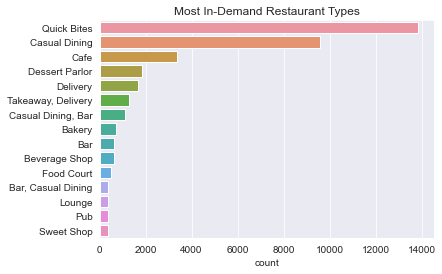

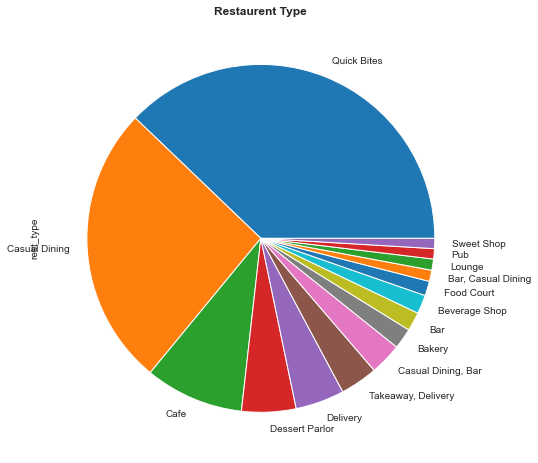

In [66]:
#Top 10 most popular restaurant types
r_type=zomato['rest_type'].value_counts()[:15]
sns.barplot(x=r_type,y=r_type.index)
plt.title("Most In-Demand Restaurant Types")
plt.xlabel("count")


plt.figure(figsize = (14,8))
zomato.rest_type.value_counts()[:15].plot(kind = 'pie')
plt.title('Restaurent Type', weight = 'bold')
plt.show()


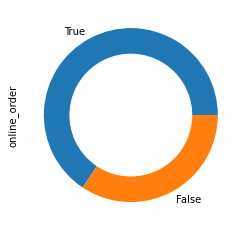

In [47]:
#Proportion of Restaurants that provide online service
zomato.online_order.value_counts().plot(kind='pie')
w_circle=plt.Circle((0,0),0.7,color='white')
p=plt.gcf()
p.gca().add_artist(w_circle)

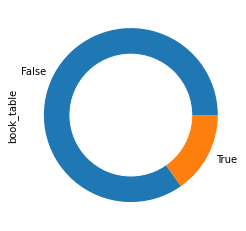

In [48]:
#Proportion of restaurants that allow booking tables
zomato.book_table.value_counts().plot(kind='pie')
w_circle=plt.Circle((0,0),0.7,color='white')
p=plt.gcf()
p.gca().add_artist(w_circle)

Text(0.5, 1.0, 'Top 10 Chain Restaurants')

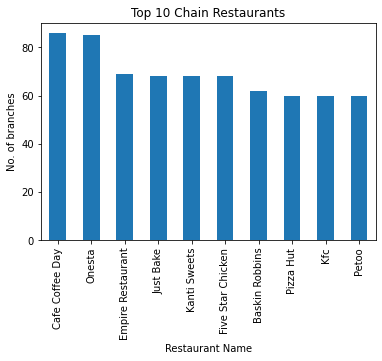

In [51]:
ax=zomato.name.value_counts()[:10].plot(kind='bar')
plt.xlabel("Restaurant Name")
plt.ylabel("No. of branches")
plt.title("Top 10 Chain Restaurants")

<AxesSubplot:xlabel='rating'>

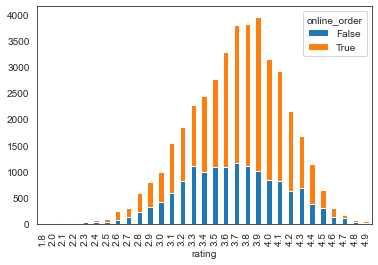

In [53]:
#Impact of Online Ordering on Ratings
#It can be seen from the chart below that restaurants that allow ordering online tend to have higher ratings
sns.set_style('white')
y=pd.crosstab(zomato.rating,zomato.online_order)
y.plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='rating'>

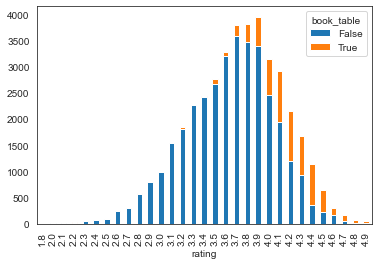

In [54]:
#Impact of Table Booking on Ratings
#It can be seen from the chart below that restaurants that allow table bookings tend to have higher ratings.
#It can be seen from the chart below that restaurants that allow ordering online tend to have higher ratings
sns.set_style('white')
y=pd.crosstab(zomato.rating,zomato.book_table)
y.plot(kind='bar',stacked=True)

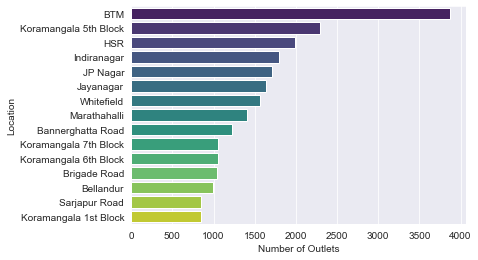

Text(0.5, 1.0, 'Location')

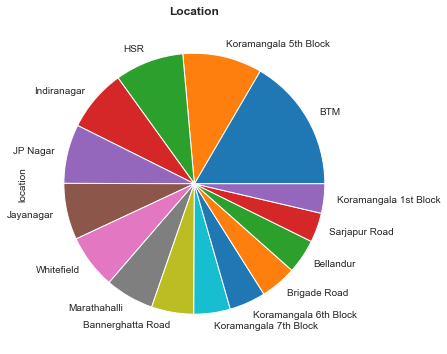

In [61]:
#top 15 restaurants
sns.set_style('darkgrid')
ch=zomato['location'].value_counts()[:15]
sns.barplot(x=ch,y=ch.index,palette='viridis')
plt.xlabel('Number of Outlets')
plt.ylabel('Location')
plt.show()

plt.figure(figsize=(12,6)) 
zomato['location'].value_counts()[:15].plot(kind = 'pie')
plt.title('Location', weight = 'bold')

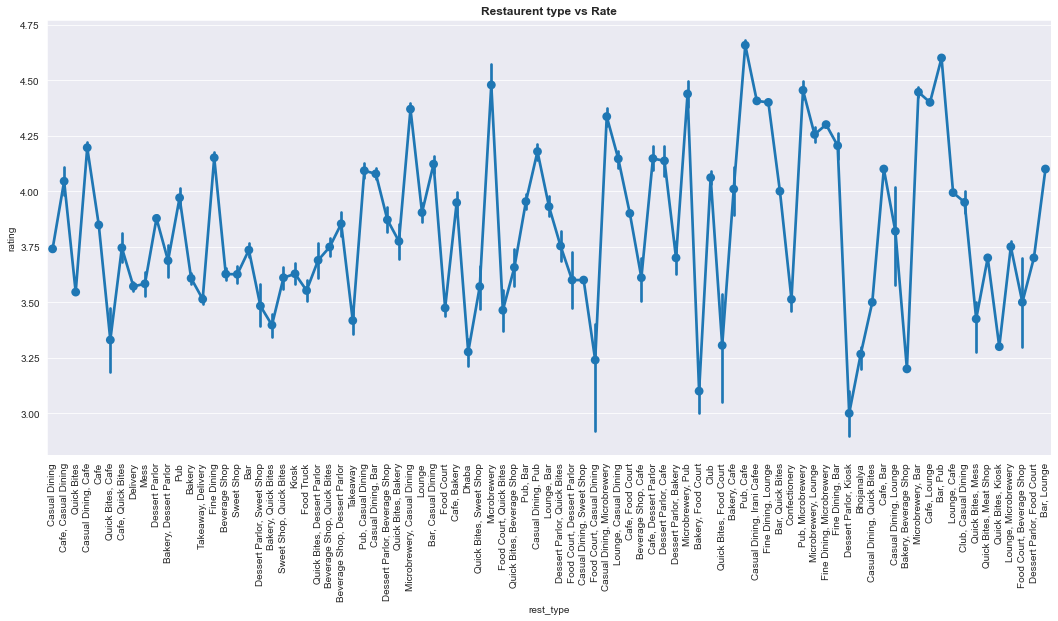

In [71]:
#Type of resturent as per rate
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=zomato["rest_type"], y=zomato["rating"], data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Rate', weight = 'bold')
plt.show()

# Predictive Models
We now proceed to build a model that can predict ratings for new restaurants on the market to enable informed decision making by the stakeholders. The first step for this is to encode the columns containing string types into some sort of code.

In [72]:
zomato

,name,online_order,book_table,rating,votes,location,rest_type,cuisines,cost,type,city
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
41185,The Farm House Bar N Grill,False,False,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,Pubs and bars,Whitefield
41186,Bhagini,False,False,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0,Pubs and bars,Whitefield
41187,Best Brews - Four Points By Sheraton Bengaluru...,False,False,3.6,27,Whitefield,Bar,Continental,1.5,Pubs and bars,Whitefield
41188,Chime - Sheraton Grand Bengaluru Whitefield Ho...,False,True,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2.5,Pubs and bars,Whitefield


In [73]:
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rating', 'cost', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

encodedZomato = Encode(zomato.copy())

In [75]:
encodedZomato

,name,online_order,book_table,rating,votes,location,rest_type,cuisines,cost,type,city
0,0,0,0,4.1,775,0,0,0,800.0,0,0
1,1,0,1,4.1,787,0,0,1,800.0,0,0
2,2,0,1,3.8,918,0,1,2,800.0,0,0
3,3,1,1,3.7,88,0,2,3,300.0,0,0
4,4,1,1,3.8,166,1,0,4,600.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
41185,2699,1,1,3.7,34,25,28,204,800.0,6,29
41186,1716,1,1,2.5,81,25,28,761,800.0,6,29
41187,6532,1,1,3.6,27,25,17,240,1.5,6,29
41188,6568,1,0,4.3,236,56,17,237,2.5,6,29


<AxesSubplot:>

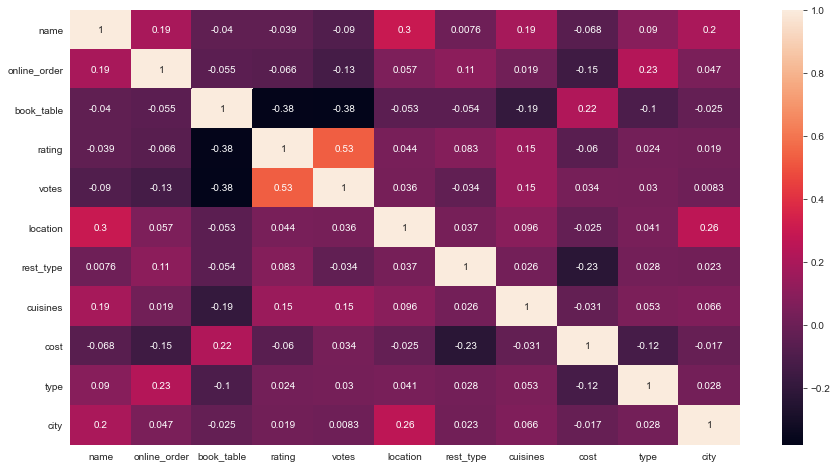

In [76]:
#plot a heatmap to get the correlation between the various available variables
corr = encodedZomato.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [77]:
#Defining X and Y for model, Train-test split
x = encodedZomato[["online_order","book_table","votes","location","rest_type","cuisines","cost","type"]]
y = encodedZomato['rating']
#Getting Test and Training Set, change test_size to change the train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=353)
x_train.shape, y_train.shape,x_test.shape,y_test.shape

((32952, 8), (32952,), (8238, 8), (8238,))

In [87]:
#Some LinReg Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.28324425364745354

In [88]:

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 15, n_estimators = 200)
xgb.fit(x_train, y_train)
y_predict=xgb.predict(x_test)

r2_score(y_test,y_predict)

0.9411365085771398

In [89]:
rf=RandomForestRegressor(n_estimators=200,random_state=50,min_samples_leaf=.00001)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
r2_score(y_test,y_pred)

0.9299342258881278

In [91]:
DTree=DecisionTreeRegressor(min_samples_leaf=.00001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
r2_score(y_test,y_predict)

0.889934265287755

In [94]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_predict=gbr.predict(x_test)
r2_score(y_test,y_predict)

0.5145977180752741

Now let us compare and contrast the performance of each of our models by arranging their r-squared scores in a tabulated format

In [96]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'XgBoost'],
    'Score' : [reg.score(x_test, y_test), DTree.score(x_test, y_test), rf.score(x_test, y_test),
               gbr.score(x_test, y_test), xgb.score(x_test, y_test)]
})


models.sort_values(by = 'Score')

,Model,Score
0,Linear Regression,0.283244
3,Gradient Boost,0.514598
1,Decision Tree,0.889934
2,Random Forest,0.929934
4,XgBoost,0.941137


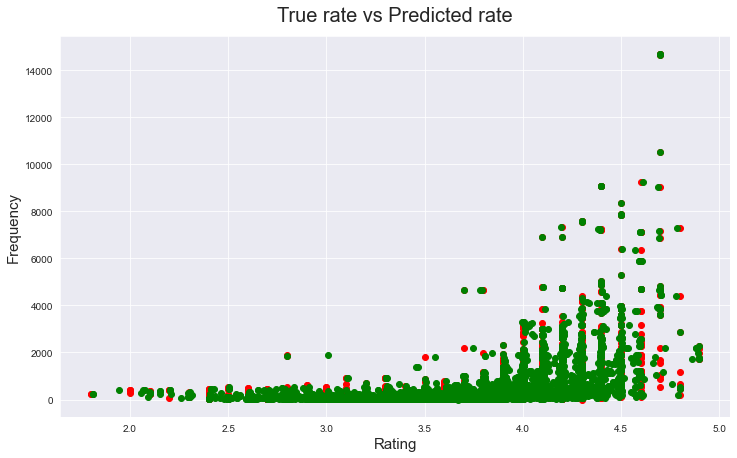

In [101]:
plt.figure(figsize=(12,7))
preds_rf = xgb.predict(x_test)
plt.scatter(y_test,x_test.iloc[:,2],color="red")
plt.title("True rate vs Predicted rate",size=20,pad=15)
plt.xlabel('Rating',size = 15)
plt.ylabel('Frequency',size = 15)
plt.scatter(preds_rf,x_test.iloc[:,2],color="green")

In [104]:
## use pickel to save our model so we can use it 
import pickle
##saveing model
pickle.dump(xgb, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))